In [1]:
from scipy.io import netcdf, loadmat
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from IPython.display import display, Math, Latex
from python_functions import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [6]:
# Calculation of potential vorticity

In [10]:
data_ERA_tempmod0 = StateRead()
data_ERA_tempmod0.readData("/hpcdata/scratch/am8e13/cs_36km_tutorial/run_tempcorrobcs/results/",range(10))
data_ERA_tempmod0.baroCalc()
data_ERA_tempmod0.topoCalc()
data_ERA_tempmod0.title('ERA run with Obs*0.5')

Potential vorticity is defined as follow:
$$
\xi = \frac{\delta v}{\delta x} - \frac{\delta u}{\delta y}
$$

In [18]:
def PotentialVorticity(U,V,res):
    ### This function calculates the gradient of the bathymetry
    if res == 18:
        file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results18km/grid.nc",'r')
    elif res == 36:
        file2read = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    dxF = file2read.variables['dxF']
    dxF = dxF[:]*1
    dyF = file2read.variables['dyF']
    dyF = dyF[:]*1
    X = file2read.variables['X']
    X = X[:]*1
    Y = file2read.variables['Y']
    Y = Y[:]*1
    Z = file2read.variables['Z']
    Z = Z[:]*1
    
    dy = len(Y)
    dx = len(X)
    dz = len(Z)
    
    U = U[:,:,0:dy,0:dx]
    V = V[:,:,0:dy,0:dx]
    


    dvdx = np.zeros_like(U)
    dudy = np.zeros_like(U)
    
    for x in range(dx-1)[1:]:
        for y in range(dy-1)[1:]:
            if x == 0 and y == 0:
                dvdx[:,:,y,x] = -(V[:,:,y,1]-V[:,:,y,0])/(dxF[y,1]-dxF[y,0])
                dudy[:,:,y,x] = -(U[:,:,1,x]-U[:,:,0,x])/(dyF[1,x]-dyF[1,x])
            elif x == 0 and y == (len(Y)-1):
                dvdx[:,:,y,x] = -(V[:,:,y,x+1]-V[:,:,y,0])/(dxF[y,1]-dxF[y,0])
                dudy[:,:,y,x] = -(U[:,:,(len(Y)-1),x]-U[:,:,y-1,x])/(dyF[(len(Y)-1),x]-dyF[y-1,x])
            elif x == (len(X)-1) and y == 0:
                dvdx[:,:,y,x] = -(V[:,:,y,(len(X)-1)]-V[:,:,y,x-1])/(dxF[y,(len(X)-1)]-dxF[y,x-1])
                dudy[:,:,y,x] = -(U[:,:,y+1,x]-U[:,:,0,x])/(dyF[y+1,x]-dyF[0,x])
            elif x == (len(X)-1) and y == (len(Y)-1):
                dvdx[:,:,y,x] = -(V[:,:,y,(len(X)-1)]-V[:,:,y,x-1])/(dxF[y,(len(X)-1)]-dxF[y,x-1])
                dudy[:,:,y,x] = -(U[:,:,y+1,x]-U[:,:,y-1,x])/(dyF[(len(Y)-1),x]-dyF[y-1,x])
            elif x == 0:
                dvdx[:,:,y,x] = -(V[:,:,y,1]-V[:,:,y,0])/(dxF[y,1]-dxF[y,0])
                dudy[:,:,y,x] = -(U[:,:,y+1,x]-U[:,:,y-1,x])/(dyF[y+1,x]-dyF[y-1,x])
            elif x == (len(X)-1):
                dvdx[:,:,y,x] = -(V[:,:,y,(len(X)-1)]-V[:,:,y,x-1])/(dxF[y,(len(X)-1)]-dxF[y,x-1])
                dudy[:,:,y,x] = -(U[:,:,y+1,x]-U[:,:,y-1,x])/(dyF[y+1,x]-dyF[y-1,x])
            elif y == 0:
                dvdx[:,:,y,x] = -(V[:,:,y,x+1]-V[:,:,y,x-1])/(dxF[y,x+1]-dxF[y,x-1])
                dudy[:,:,y,x] = -(U[:,:,1,x]-U[:,:,0,x])/(dxF[1,x]-dxF[0,x])
            elif y == (len(Y)-1):
                dvdx[:,:,y,x] = -(V[:,:,y,x+1]-V[:,:,y,x-1])/(dxF[y,x+1]-dxF[y,x-1])
                dudy[:,:,y,x] = -(U[:,:,(len(Y)-1),x]-U[:,:,y-1,x])/(dyF[(len(Y)-1),x]-dyF[y-1,x])
            elif res == 36 and y == 69:
                dvdx[:,:,y,x] = -(V[:,:,y,x+1]-V[:,:,y,x-1])/(dxF[y,x+1]-dxF[y,x-1])
                dudy[:,:,y,x] = -(U[:,:,y+1,x]-U[:,:,y-1,x])/(dyF[y+2,x]-dyF[y,x])
            else:
                dvdx[:,:,y,x] = -(V[:,:,y,x+1]-V[:,:,y,x-1])/(dxF[y,x+1]-dxF[y,x-1])
                dudy[:,:,y,x] = -(U[:,:,y+1,x]-U[:,:,y-1,x])/(dyF[y+1,x]-dyF[y-1,x])
                
    return dvdx, dudy


In [19]:
dvdx,dudy = PotentialVorticity(data_ERA_tempmod0.data['U'],data_ERA_tempmod0.data['V'],36)


<matplotlib.colorbar.Colorbar instance at 0x2b4db4808128>

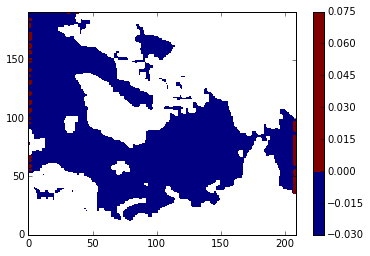

In [22]:
plt.contourf(dvdx[0,0,:,:]-dudy[0,0,:,:],vmin=-0.001,vmax=0.001)
plt.colorbar()